## Creator ranking

In [181]:
import pandas as pd
import numpy as np

moonshot = pd.read_pickle('moonshot_submissions.p')
moonshot['pIC50'] = moonshot.IC50.apply(lambda i: -np.log10(i))

In [233]:
import re

class NameFixer:
    lab_heads = {'London Lab': 'Nir London', 
                 'Chodera Lab': 'John Chodera',
                'Lee Lab': 'Alpha Lee',
                'Trippier': '?? Trippier', 
                'Volkamer': '?? Volkamer'}
    known = {'Warren': 'Warren Thompson',
             'Jag': 'Jag Heer',
             'Jan': 'Jan Hullaert'}
    weirds = ['Med-Chem team', 'INSCoV',]
    redirect = {'Med Chemists Group': 'Med-Chem team',
               'Tatiana': 'Tetiana Matviyuk'}
    
    def __init__(self):
        self.unmatched = set()
        self.single_names = set()
        
    def __call__(self, name: str) -> str:
        """
        Find Matt Robinson. Remove titles. Remove initials.
        Skip single name folk
        """
        # weird id set
        for weird in self.weirds:
            if weird in name:
                return weird
            
        s = name.title()
        if s in self.redirect:
            return self.redirect[s]
        for r in self.redirect:
            if r in s:
                return self.redirect[r]
        
        if s in ('-', '', ' ', 'Anon'):
            return 'anonymous'
        
        # clean
        s = s.replace('Matt ', 'Matthew ')
        s = re.sub(r'^Dr.?', '', s)
        s = re.sub(r'^Prof.?', '', s)
        s = re.sub(r'^(\w)\.? ', r'\1', s)
        s = re.sub(r'(\w)-(\w)', r'\1\2', s)
        s = re.sub(r' (\w)\.? ', r' ', s)
        s = re.sub(r' (\w) ', r' ', s)
        s = re.sub(r'\s+', r' ', s)
        s = re.sub(r' And .*', r'', s)  # title makes and -> And
        s = re.sub(r'Inscov.*', 'Inscov', s).strip()
        
        r = re.match(r'^([ \w]+)', s)
        
        if not r:
            self.unmatched.add(name)
            return ''
        
        s = r.group(1).strip()
        if 'Lab' in s and s in self.lab_heads:
            return self.lab_heads[s]
        if s in self.redirect:
            return self.redirect[s]
        if s.count(' ') != 0:
            return s
        if s in self.known:
            return self.known[s]
        self.single_names.add(s)
        r = re.match(r'^([ \w]+)[,.&] ([ \w]+)', name)
        if not r:
            self.unmatched.add(name)
            return 'anonymous'
        
        return r.group(1).strip()+' '+r.group(2).strip()
    
    def revisit(self, name, series):
        return series.loc[series.str.contains(name)].drop_duplicates()
 
# debugged:
# dejunk = NameFixer()
# for name in ('Ed J Griffen, MedChemica Ltd', 'Jan, Ghent University', 'Ed, Griffen', 'K. Takahashi'):
#     print( name, '>', dejunk(name) )

dejunk = NameFixer()
moonshot['clean_creator'] = moonshot.creator.fillna('').astype(str).apply(dejunk)
sum(moonshot['clean_creator'] == ''), len(moonshot)

(0, 20997)

The following 112 people had a submission or more made: 


,Mdn shipment date,Mdn N words,N submissions,N assayed,N made,N crystallised,N assayed (early wave),N made (early wave),N crystallised (early wave),N assayed (late wave),...,Min IC50 (early wave),Min IC50 (late wave),crystal-over-made %,crystal-over-made % (early wave),crystal-over-made % (late wave),N IC50 ≤ 50 µM,N IC50 ≤ 20 µM,N IC50 ≤ 1 µM,N IC50 ≤ 0.1 µM,sub50-over-assayed %
Matthew Robinson,2021-02-11 00:00:00,10,796,382,465,100,21,85,18,357,...,16.40,0.04,22±2%,21±4%,22±2%,179,159,80,11,47±3%
Aaron Morris,2021-04-16 00:00:00,12,119,4,84,71,2,15,2,2,...,37.80,NaN,85±4%,13±9%,100±0%,1,0,0,0,25±22%
Ed Griffen,2021-02-17 00:00:00,15,740,176,188,56,8,20,11,165,...,2.03,0.04,30±3%,55±11%,27±3%,121,105,53,6,69±3%
anonymous,2021-11-03 00:00:00,0,1760,326,349,55,0,0,0,301,...,NaN,0.02,16±2%,nan±nan%,17±2%,184,179,125,28,56±3%
Alpha Lee,2020-06-10 00:00:00,5,765,382,398,42,11,17,8,173,...,0.05,0.09,11±2%,47±12%,18±3%,72,65,31,3,19±2%
Nir London,2020-05-20 00:00:00,11,385,149,280,23,50,179,22,95,...,0.50,99.50,8±2%,12±2%,1±1%,14,11,1,0,9±2%
Jan Hullaert,2020-06-10 00:00:00,16,137,11,36,18,10,35,18,1,...,8.30,99.50,50±8%,51±8%,0±0%,6,4,0,0,55±15%
Ralph Robinson,2021-01-20 00:00:00,25,199,51,51,17,0,0,0,51,...,NaN,0.19,33±7%,nan±nan%,33±7%,37,27,12,0,73±6%
Bart Lenselink,2020-04-27 00:00:00,30,169,3,79,13,3,79,13,0,...,35.70,NaN,16±4%,16±4%,nan±nan%,1,0,0,0,33±27%
Benjamin Perry,2020-09-22 00:00:00,14,241,40,57,13,8,24,8,31,...,7.55,0.18,23±6%,33±10%,16±6%,16,14,3,0,40±8%


In [531]:
creators.sort_values('N crystallised').tail(20)

,Mdn shipment date,Mdn N words,N submissions,N assayed,N made,N crystallised,N assayed (early wave),N made (early wave),N crystallised (early wave),N assayed (late wave),...,Min IC50 (early wave),Min IC50 (late wave),crystal-over-made %,crystal-over-made % (early wave),crystal-over-made % (late wave),N IC50 ≤ 50 µM,N IC50 ≤ 20 µM,N IC50 ≤ 1 µM,N IC50 ≤ 0.1 µM,sub50-over-assayed %
Gabriel Grand,2020-05-13,227,66,1,10,4,1,10,4,0,...,99.000,NaN,40±15%,40±15%,nan±nan%,0,0,0,0,0±0%
Michal K,2021-01-08,23,277,15,15,5,0,0,0,15,...,NaN,0.2080,33±12%,nan±nan%,33±12%,7,7,6,0,47±13%
Vladas Oleinikovas,2021-01-28,11,142,12,13,6,1,2,0,11,...,NaN,0.3590,46±14%,0±0%,55±15%,7,6,3,0,58±14%
Med-Chem team,2020-06-10,35,72,12,23,6,10,21,4,2,...,0.543,2.6400,26±9%,19±9%,100±0%,9,6,1,0,75±12%
Eric Jnoff,2020-09-22,14,114,12,16,7,0,4,1,12,...,NaN,1.1000,44±12%,25±22%,50±14%,9,6,0,0,75±12%
Lori Ferrins,2020-07-21,69,34,21,33,7,15,27,6,6,...,NaN,NaN,21±7%,22±8%,17±15%,0,0,0,0,0±0%
Jag Heer,2020-06-30,13,144,26,53,7,2,28,4,22,...,NaN,26.0000,13±5%,14±7%,9±6%,1,0,0,0,4±4%
Daren Fearon,2020-05-02,13,833,15,32,8,7,24,8,7,...,2.750,0.5220,25±8%,33±10%,0±0%,9,7,1,0,60±13%
Bart Lenselink,2020-04-27,30,169,3,79,13,3,79,13,0,...,35.700,NaN,16±4%,16±4%,nan±nan%,1,0,0,0,33±27%
Benjamin Perry,2020-09-22,14,241,40,57,13,8,24,8,31,...,7.550,0.1760,23±6%,33±10%,16±6%,16,14,3,0,40±8%


In [532]:
sum((creators['N made'] < 50) & (creators['N made'] > 0))

99

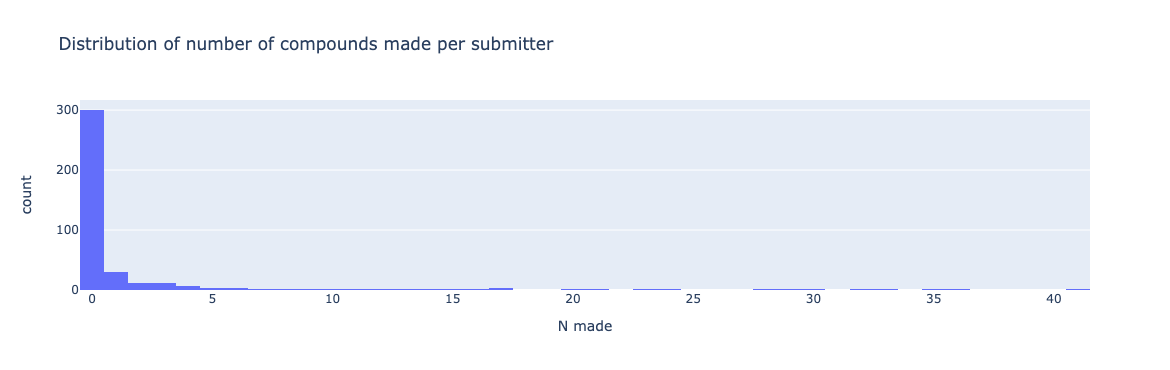

In [534]:
import plotly.express as px

px.histogram(creators.loc[creators['N made'] < 50],
             'N made', 
             title='Distribution of number of compounds made per submitter',
             nbins=50)

Text(0.5, 0.98, 'Wordiness vs. N made per submitter (rho: -0.19, p: 0.085)')

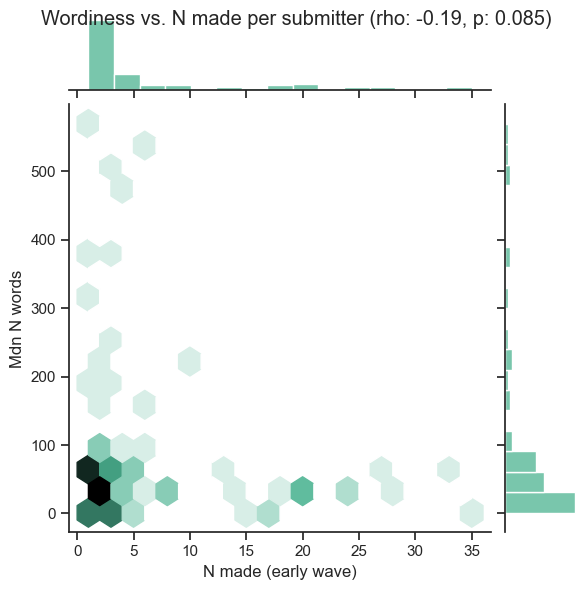

In [535]:
import seaborn as sns
from scipy.stats import pearsonr
sns.set_theme(style="ticks")
date_cutoff = dt.datetime(2020, 8, 1)

subbed = creators.loc[(creators['N made (early wave)'] >0) & (creators['N made (early wave)'] <= 50)]
plot = sns.jointplot(x=subbed['N made (early wave)'], 
                  y=subbed['Mdn N words'],
                  kind="hex", 
                     color="#4CB391")
rho = pearsonr(subbed['N made (early wave)'], subbed['Mdn N words'])
plot.fig.suptitle(f"Wordiness vs. N made per submitter (rho: {rho.statistic:.2}, p: {rho.pvalue:.2})")


In [536]:
creators['mean pIC50'] = creators['Gmean IC50'].apply(lambda v: -np.log10(v))
creators['mean pIC50 (early wave)'] = creators['Gmean IC50 (early wave)'].apply(lambda v: -np.log10(v))

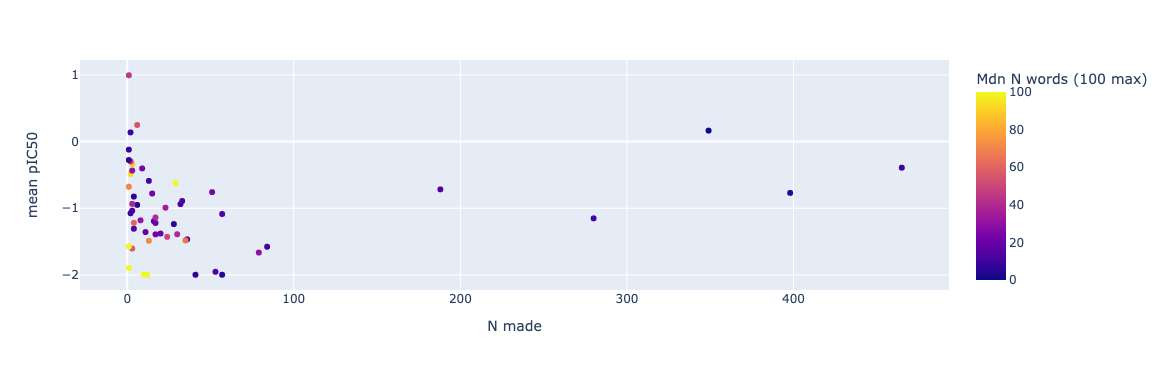

In [537]:
creators['Mdn N words (100 max)'] = creators['Mdn N words'].apply(lambda v: min(v, 100))
creators['name'] = creators.index
px.scatter(creators, 'N made', 'mean pIC50',
           hover_data=['name', 'N made (early wave)', 'N made (late wave)'],
           color='Mdn N words (100 max)')

In [538]:
sum(~creators['Gmean IC50 (early wave)'].isna()), sum(~creators['Gmean IC50'].isna())

(30, 54)

Text(0.5, 0.98, 'Wordiness vs. mean pIC50 per submitter (rho: -0.076, p: 0.13)')

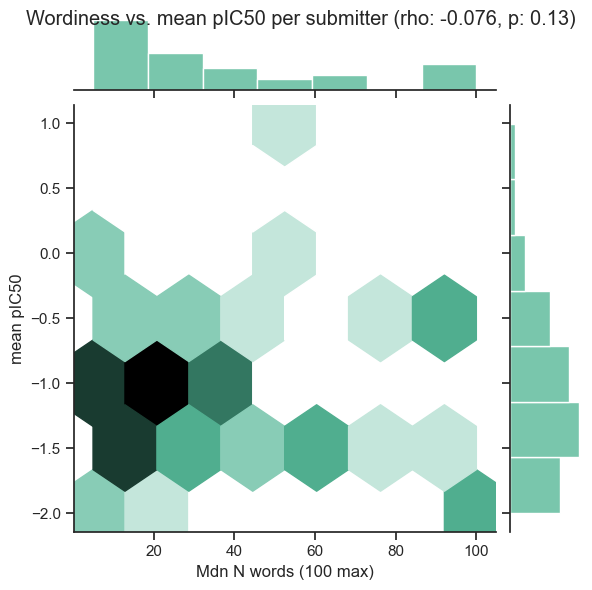

In [539]:
import seaborn as sns
from scipy.stats import pearsonr
sns.set_theme(style="ticks")
date_cutoff = dt.datetime(2020, 8, 1)

subbed = creators.loc[(creators['N made'] < 100)]
plot = sns.jointplot(x=subbed['Mdn N words (100 max)'], 
                  y=subbed['mean pIC50'],
                  kind="hex", 
                     color="#4CB391")
rho = pearsonr(subbed['N made'], subbed['Mdn N words'])
plot.fig.suptitle(f"Wordiness vs. mean pIC50 per submitter (rho: {rho.statistic:.2}, p: {rho.pvalue:.2})")


In [540]:
np.log(2.7)

0.9932517730102834

In [541]:
creators['ln N submissions'] = creators['N submissions'].apply(np.log)
creators['ln N made'] = creators['N made'].apply(np.log)
creators['made-over-submissions-ratio'] = creators['N made'] / creators['N submissions']

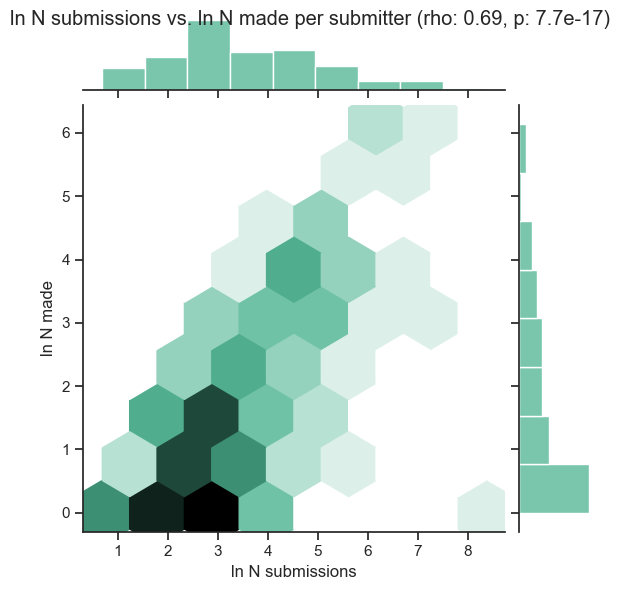

In [542]:
import seaborn as sns
from scipy.stats import pearsonr
sns.set_theme(style="ticks")
date_cutoff = dt.datetime(2020, 8, 1)

subbed = creators.loc[(creators['N made'] > 0)]
xcol = 'ln N submissions'
ycol = 'ln N made'
plot = sns.jointplot(x=subbed[xcol], 
                  y=subbed[ycol],
                  kind="hex", 
                     color="#4CB391")
rho = pearsonr(subbed[xcol], subbed[ycol])
plot.fig.suptitle(f"{xcol} vs. {ycol} per submitter (rho: {rho.statistic:.2}, p: {rho.pvalue:.2})")
None

In [543]:
creators.loc[creators['N submissions'] > 20]['made-over-submissions-ratio'].median()

0.05108243479092452

In [544]:
creators.loc[creators['N submissions'] > 20]['made-over-submissions-ratio'].sort_values(ascending=False)[:20]

Redesign Science        1.000000
UNK Cyclica             0.978022
Lori Ferrins            0.970588
UNK UNK                 0.931373
Jin Pan                 0.809524
Nir London              0.727273
Aaron Morris            0.705882
Matthew Robinson        0.584171
Alpha Lee               0.520261
Bart Lenselink          0.467456
William Mccorkindale    0.398058
Jarryl D                0.396226
Tryfon Zarganis         0.369231
Jag Heer                0.368056
Duncan Miller           0.320000
Med-Chem team           0.319444
Bruce Lefker            0.300000
Jan Hullaert            0.262774
Ralph Robinson          0.256281
Ed Griffen              0.254054
Name: made-over-submissions-ratio, dtype: float64

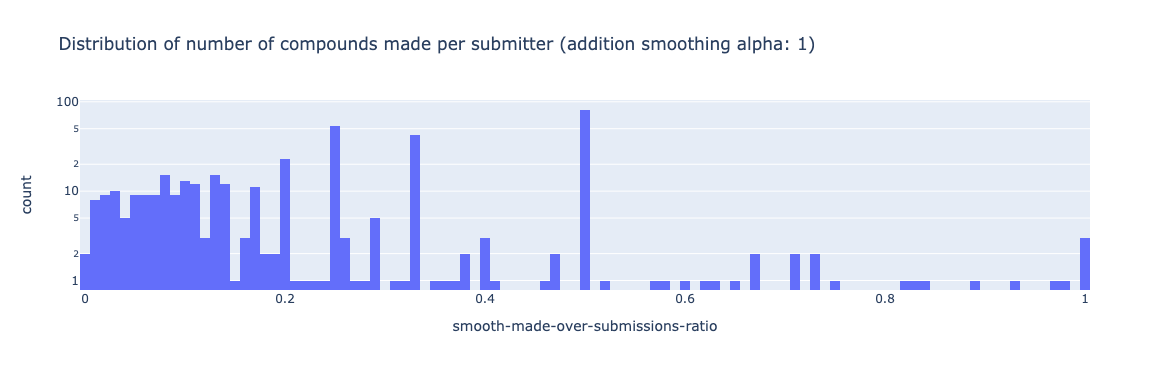

In [601]:
d = len(creators['N made'])
N = creators['N made'].sum()
alpha = 1
creators['smooth_made'] = creators['N made'].apply(lambda v: (v+alpha)/(N+alpha*d)*N)
creators['smooth_submissions'] = creators['N submissions'].apply(lambda v: (v+alpha)/(N+alpha*d)*N)
creators['smooth-made-over-submissions-ratio'] = creators['smooth_made']/creators['smooth_submissions']


px.histogram(creators,
             'smooth-made-over-submissions-ratio',
             log_y=True,
             title=f'Distribution of number of compounds made per submitter (addition smoothing alpha: {alpha})',
             nbins=100)

In [ ]:
_.d

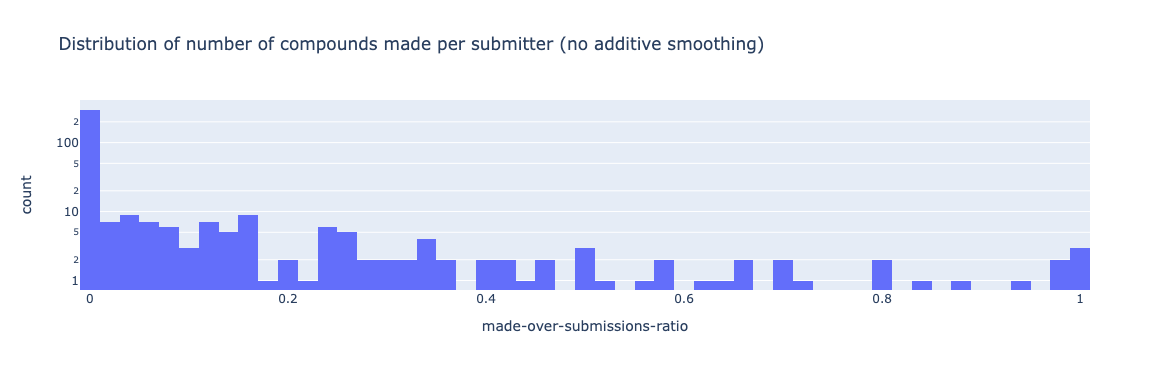

In [617]:
px.histogram(creators,
                                     'made-over-submissions-ratio',
                                     log_y=True,
                                     title=f'Distribution of number of compounds made per submitter (no additive smoothing)',
                                     nbins=100)

<function Figure.mro()>

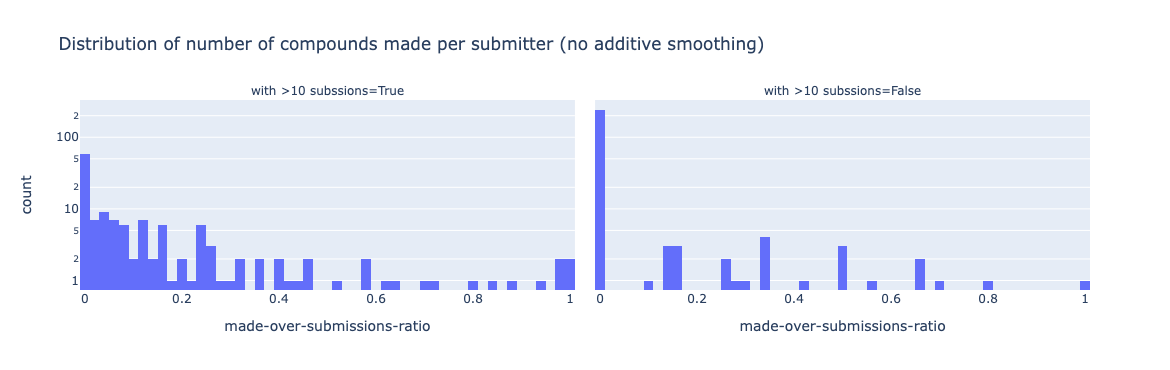

In [620]:
creators['with >10 subssions'] = creators['N submissions'] > 10

px.histogram(creators,
             'made-over-submissions-ratio',
             log_y=True,
             facet_col='with >10 subssions',
             title=f'Distribution of number of compounds made per submitter (no additive smoothing)',
             nbins=100)

In [546]:
creators.sort_values('smooth-made-over-submissions-ratio', ascending=False)

,Mdn shipment date,Mdn N words,N submissions,N assayed,N made,N crystallised,N assayed (early wave),N made (early wave),N crystallised (early wave),N assayed (late wave),...,mean pIC50,mean pIC50 (early wave),Mdn N words (100 max),name,ln N submissions,ln N made,made-over-submissions-ratio,smooth_made,smooth_submissions,smooth-made-over-submissions-ratio
Redesign Science,2021-07-28,5,57,56,57,0,0,0,0,54,...,-1.997863,NaN,5,Redesign Science,4.043051,4.043051,1.000000,51.010213,51.010213,1.000000
Khriesto Shurrush,NaT,2,2,2,2,0,0,0,0,0,...,NaN,NaN,2,Khriesto Shurrush,0.693147,0.693147,1.000000,2.638459,2.638459,1.000000
Aaron Keeley,2020-09-01,120,14,14,14,1,0,0,0,14,...,NaN,NaN,100,Aaron Keeley,2.639057,2.639057,1.000000,13.192296,13.192296,1.000000
UNK Cyclica,2021-05-12,7,91,3,89,0,0,0,0,3,...,NaN,NaN,7,UNK Cyclica,4.510860,4.488636,0.978022,79.153779,80.912752,0.978261
Lori Ferrins,2020-07-21,69,34,21,33,7,15,27,6,6,...,NaN,NaN,69,Lori Ferrins,3.526361,3.496508,0.970588,29.902539,30.782025,0.971429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Keith Davies,NaT,104,124,0,0,0,0,0,0,0,...,NaN,NaN,100,Keith Davies,4.820282,-inf,0.000000,0.879486,109.935804,0.008000
Njabulo Gumede,NaT,7,131,0,0,0,0,0,0,0,...,NaN,NaN,7,Njabulo Gumede,4.875197,-inf,0.000000,0.879486,116.092209,0.007576
Julien Hazemann,NaT,139,157,0,0,0,0,0,0,0,...,NaN,NaN,100,Julien Hazemann,5.056246,-inf,0.000000,0.879486,138.958856,0.006329
Sadit Joarder,NaT,16,312,0,0,0,0,0,0,0,...,NaN,NaN,16,Sadit Joarder,5.743003,-inf,0.000000,0.879486,275.279253,0.003195


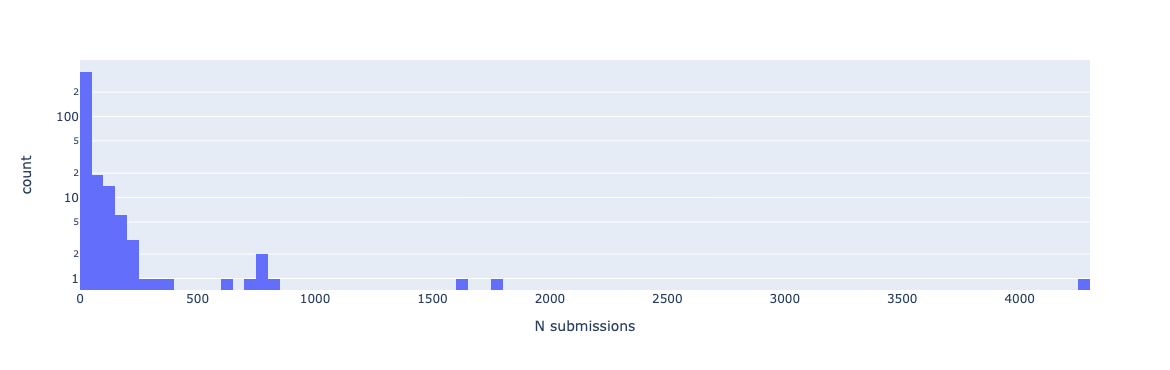

In [547]:
px.histogram(creators, 'N submissions', log_y=True)

In [548]:
subbed = creators.loc[creators['N submissions'] >= 10]
print(
f"""
Number of submitters with fewer than 10 submissions (none made): {sum((creators['N submissions'] < 10) & (creators['N made'] == 0))}
Number of submitters with fewer than 10 submissions (one made): {sum((creators['N submissions'] < 10) & (creators['N made'] == 1))}
Number of submitters with fewer than 10 submissions (two plus made): {sum((creators['N submissions'] < 10) & (creators['N made'] >= 2))}
Number of submitters with nothing made: {sum(subbed['made-over-submissions-ratio'] == 0)}
Number of submitters with <5% made: {sum((subbed['made-over-submissions-ratio'] <= 0.05) & (subbed['made-over-submissions-ratio'] > 0))}
Number of submitters with 5–10% made: {sum((subbed['made-over-submissions-ratio'] <= 0.1) & (subbed['made-over-submissions-ratio'] > 0.05))}
Number of submitters with 10-20% made: {sum((subbed['made-over-submissions-ratio'] <= 0.2) & (subbed['made-over-submissions-ratio'] > 0.1))}
Number of submitters with >20-100% made: {sum((subbed['made-over-submissions-ratio'] <= 1) & (subbed['made-over-submissions-ratio'] > 0.2))}
"""
)


Number of submitters with fewer than 10 submissions (none made): 236
Number of submitters with fewer than 10 submissions (one made): 14
Number of submitters with fewer than 10 submissions (two plus made): 8
Number of submitters with nothing made: 65
Number of submitters with <5% made: 17
Number of submitters with 5–10% made: 16
Number of submitters with 10-20% made: 18
Number of submitters with >20-100% made: 39



In [549]:
metadata['xcode'] = metadata['RealCrystalName'].str.split('-', expand=True)[1]
moonshot['xcode'] = moonshot['CID (canonical)'].map(metadata.set_index('alternate_name').xcode.to_dict()).fillna('')
metadata

,crystal_name,RealCrystalName,smiles,new_smiles,alternate_name,site_name,pdb_entry,xcode
1,Mpro-x11271_0A,Mpro-x11271,COC=1C=C(Cl)C=C(CC(=O)NC=2C=NC=CC2C)C1,NaN,MAT-POS-c9973a83-1,Aminopyridine-like,NaN,x11271
2,Mpro-x11041_0A,Mpro-x11041,CN(C(=O)CC=1C=CC=C(Cl)C1)C=2C=NC=CC2C,NaN,JAN-GHE-83b26c96-15,Aminopyridine-like,NaN,x11041
3,Mpro-x1002_0A,Mpro-x1002,OC=1C=CC=CN1,NaN,AAR-POS-0daf6b7e-37,XChem Screen - xtal contact,5RF4,x1002
4,Mpro-x10155_0A,Mpro-x10155,CC(N1CCN(Cc2cnc(Cc3ccccc3)s2)CC1)=O,CC(N1CCN(Cc2cnc(Cc3ccccc3)s2)CC1)=O,MED-COV-4280ac29-25,Chloroacetamide,NaN,x10155
5,Mpro-x1101_1A,Mpro-x1101,CC(C)N(C)C=1N=CN=C2N(C)N=CC12,NaN,AAR-POS-0daf6b7e-40,XChem Screen - xtal contact,5RGR,x1101
...,...,...,...,...,...,...,...,...
870,Mpro-z7au4_0A,Mpro-z7au4,OC1N[C@]2(CCC3CC(Cl)CC[C@@H]32)[C@@H](O)N1CC1C...,NaN,Carlsson 3,PDB - SARS-CoV-2 Mpro,7AU4,z7au4
871,Mpro-z7b2j_0A,Mpro-z7b2j,CC1CCN(C(O)CN2NNC3CCCCC32)CC1,NaN,Carlsson 5,PDB - SARS-CoV-2 Mpro,7B2J,z7b2j
872,Mpro-z7qbb_0A,Mpro-z7qbb,OC1N[C@]2(C[C@@H](C3CCCCC3)C2)C(O)N1[C@@H]1CNC...,NaN,Carlsson 18,PDB - SARS-CoV-2 Mpro,7QBB,z7qbb
873,Mpro-z7neo_0B,Mpro-z7neo,OC1N[C@]2(C[C@H](C3CCC3)C2)C(O)N1C1CNCC(F)C1,NaN,Carlsson 15,PDB - SARS-CoV-2 Mpro,7NEO,z7neo


In [550]:
moonshot[['CID (canonical)', 'SMILES',
          'clean_creator', 
          'words', 'IC50',
          'fragments','inspired_by',
          'Structure ID',
          
       'Submission Notes'
    'clean_creator', 'inferred_submission_date', 'in_fragalysis',
    
    
    
    , 'CID', , 'CID (old format)',
       'Postera Link', 'InChIKey', , 'fragments', 'Structure ID', 'Fragalysis Link',
       'Enamine - REAL Space', 'Enamine - Extended REAL Space',
       'Enamine - SCR', 'Enamine - BB', 'Mcule', 'Mcule Ultimate',
       'In Molport or Mcule', 'In eMolecules', 'MW', 'cLogP', 'TPSA',
       'Rotatable Bonds', 'Fraction sp3', 'HBA', 'HBD',
       'Covalent Fragment', 'covalent_warhead', 'Acrylamide',
       'Acrylamide Adduct', 'Chloroacetamide', 'Chloroacetamide Adduct',
       'Vinylsulfonamide', 'Vinylsulfonamide Adduct', 'Nitrile',
       'Nitrile Adduct', 'series', 'Order Date', 'Maker', 'Shipment Date',
       'inspired_by', 'CDD_name', 'CDD_mol_ID', 'r_curve_IC50_x',
       'r_max_inhibition_reading_x', 'r_min_inhibition_reading_x',
       'r_hill_slope_x', 'r_R2_x', 'r_concentration_uM_x',
       'r_inhibition_list_x', 'f_curve_IC50_x',
       'f_max_inhibition_reading_x', 'f_min_inhibition_reading_x',
       'f_hill_slope_x', 'f_R2_x', 'f_concentration_uM_x',
       'f_inhibition_list_x', 'structure_ID_x', 'structure_LINK_x',
       'ORDERED', 'MAKER', 'ORDER_DATE', 'MADE', 'SHIPMENT_DATE',
       'ASSAYED', 'creator.1', 'rationale.1', 'fragments.1',
       'covalent_warhead.1', 'r_curve_IC50_y',
       'r_max_inhibition_reading_y', 'r_min_inhibition_reading_y',
       'r_hill_slope_y', 'r_R2_y', 'r_concentration_uM_y',
       'r_inhibition_list_y', 'f_curve_IC50_y',
       'f_max_inhibition_reading_y', 'f_min_inhibition_reading_y',
       'f_hill_slope_y', 'f_R2_y', 'f_concentration_uM_y',
       'f_inhibition_list_y', 'structure_ID_y', 'structure_LINK_y',
       'creator.1.1', 'rationale.1.1', 'fragments.1.1',
       'covalent_warhead.1.1', 'r_curve_IC50_x.1',
       'r_max_inhibition_reading_x.1', 'r_min_inhibition_reading_x.1',
       'r_hill_slope_x.1', 'r_R2_x.1', 'r_concentration_uM_x.1',
       'r_inhibition_list_x.1', 'f_curve_IC50_x.1',
       'f_max_inhibition_reading_x.1', 'f_min_inhibition_reading_x.1',
       'f_hill_slope_x.1', 'f_R2_x.1', 'f_concentration_uM_x.1',
       'f_inhibition_list_x.1', 'structure_ID_x.1', 'structure_LINK_x.1',
       'creator.1.1.1', 'rationale.1.1.1', 'fragments.1.1.1',
       'covalent_warhead.1.1.1', 'r_curve_IC50_y.1',
       'r_max_inhibition_reading_y.1', 'r_min_inhibition_reading_y.1',
       'r_hill_slope_y.1', 'r_R2_y.1', 'r_concentration_uM_y.1',
       'r_inhibition_list_y.1', 'f_curve_IC50_y.1',
       'f_max_inhibition_reading_y.1', 'f_min_inhibition_reading_y.1',
       'f_hill_slope_y.1', 'f_R2_y.1', 'f_concentration_uM_y.1',
       'f_inhibition_list_y.1', 'structure_ID_y.1', 'structure_LINK_y.1',
       'creator.1.1.1.1', 'rationale.1.1.1.1', 'fragments.1.1.1.1',
       'covalent_warhead.1.1.1.1', 'r_curve_IC50_x.1.1',
       'r_max_inhibition_reading_x.1.1', 'r_min_inhibition_reading_x.1.1',
       'r_hill_slope_x.1.1', 'r_R2_x.1.1', 'r_concentration_uM_x.1.1',
       'r_inhibition_list_x.1.1', 'f_curve_IC50_x.1.1',
       'f_max_inhibition_reading_x.1.1', 'f_min_inhibition_reading_x.1.1',
       'f_hill_slope_x.1.1', 'f_R2_x.1.1', 'f_concentration_uM_x.1.1',
       'f_inhibition_list_x.1.1', 'structure_ID_x.1.1',
       'structure_LINK_x.1.1', 'creator.1.1.1.1.1', 'rationale.1.1.1.1.1',
       'fragments.1.1.1.1.1', 'covalent_warhead.1.1.1.1.1',
       'r_curve_IC50_y.1.1', 'r_max_inhibition_reading_y.1.1',
       'r_min_inhibition_reading_y.1.1', 'r_hill_slope_y.1.1',
       'r_R2_y.1.1', 'r_concentration_uM_y.1.1',
       'r_inhibition_list_y.1.1', 'f_curve_IC50_y.1.1',
       'f_max_inhibition_reading_y.1.1', 'f_min_inhibition_reading_y.1.1',
       'f_hill_slope_y.1.1', 'f_R2_y.1.1', 'f_concentration_uM_y.1.1',
       'f_inhibition_list_y.1.1', 'structure_ID_y.1.1',
       'structure_LINK_y.1.1', 'creator.1.1.1.1.1.1',
       'rationale.1.1.1.1.1.1', 'fragments.1.1.1.1.1.1',
       'covalent_warhead.1.1.1.1.1.1', 'r_curve_IC50_x.1.1.1',
       'r_max_inhibition_reading_x.1.1.1',
       'r_min_inhibition_reading_x.1.1.1', 'r_hill_slope_x.1.1.1',
       'r_R2_x.1.1.1', 'r_concentration_uM_x.1.1.1',
       'r_inhibition_list_x.1.1.1', 'f_curve_IC50_x.1.1.1',
       'f_max_inhibition_reading_x.1.1.1',
       'f_min_inhibition_reading_x.1.1.1', 'f_hill_slope_x.1.1.1',
       'f_R2_x.1.1.1', 'f_concentration_uM_x.1.1.1',
       'f_inhibition_list_x.1.1.1', 'structure_ID_x.1.1.1',
       'structure_LINK_x.1.1.1', 'creator.1.1.1.1.1.1.1',
       'rationale.1.1.1.1.1.1.1', 'fragments.1.1.1.1.1.1.1',
       'covalent_warhead.1.1.1.1.1.1.1', 'r_curve_IC50_y.1.1.1',
       'r_max_inhibition_reading_y.1.1.1',
       'r_min_inhibition_reading_y.1.1.1', 'r_hill_slope_y.1.1.1',
       'r_R2_y.1.1.1', 'r_concentration_uM_y.1.1.1',
       'r_inhibition_list_y.1.1.1', 'f_curve_IC50_y.1.1.1',
       'f_max_inhibition_reading_y.1.1.1',
       'f_min_inhibition_reading_y.1.1.1', 'f_hill_slope_y.1.1.1',
       'f_R2_y.1.1.1', 'f_concentration_uM_y.1.1.1',
       'f_inhibition_list_y.1.1.1', 'structure_ID_y.1.1.1',
       'structure_LINK_y.1.1.1', 'creator.1.1.1.1.1.1.1.1',
       'rationale.1.1.1.1.1.1.1.1', 'fragments.1.1.1.1.1.1.1.1',
       'covalent_warhead.1.1.1.1.1.1.1.1', 'r_curve_IC50_x.1.1.1.1',
       'r_max_inhibition_reading_x.1.1.1.1',
       'r_min_inhibition_reading_x.1.1.1.1', 'r_hill_slope_x.1.1.1.1',
       'r_R2_x.1.1.1.1', 'r_concentration_uM_x.1.1.1.1',
       'r_inhibition_list_x.1.1.1.1', 'f_curve_IC50_x.1.1.1.1',
       'f_max_inhibition_reading_x.1.1.1.1',
       'f_min_inhibition_reading_x.1.1.1.1', 'f_hill_slope_x.1.1.1.1',
       'f_R2_x.1.1.1.1', 'f_concentration_uM_x.1.1.1.1',
       'f_inhibition_list_x.1.1.1.1', 'structure_ID_x.1.1.1.1',
       'structure_LINK_x.1.1.1.1', 'creator.1.1.1.1.1.1.1.1.1',
       'rationale.1.1.1.1.1.1.1.1.1', 'fragments.1.1.1.1.1.1.1.1.1',
       'covalent_warhead.1.1.1.1.1.1.1.1.1', 'r_inhibition_at_20_uM',
       'r_inhibition_at_50_uM', 'r_avg_IC50', 'r_curve_IC50_y.1.1.1.1',
       'r_max_inhibition_reading_y.1.1.1.1',
       'r_min_inhibition_reading_y.1.1.1.1', 'r_hill_slope_y.1.1.1.1',
       'r_R2_y.1.1.1.1', 'r_concentration_uM_y.1.1.1.1',
       'r_inhibition_list_y.1.1.1.1', 'f_inhibition_at_20_uM',
       'f_inhibition_at_50_uM', 'f_avg_IC50', 'f_avg_pIC50',
       'f_curve_IC50_y.1.1.1.1', 'f_max_inhibition_reading_y.1.1.1.1',
       'f_min_inhibition_reading_y.1.1.1.1', 'f_hill_slope_y.1.1.1.1',
       'f_R2_y.1.1.1.1', 'f_concentration_uM_y.1.1.1.1',
       'f_inhibition_list_y.1.1.1.1', 'relative_solubility_at_20_uM',
       'relative_solubility_at_100_uM', 'trypsin_IC50', 'NMR_std_ratio',
       'structure_ID_y.1.1.1.1', 'structure_LINK_y.1.1.1.1',
       'Submission Creator', 'Submission Rationale',
       'Submission Fragments', 'Ordered', 'Made', 'Assayed',
       'Covalent Warhead', 'CID_group', 'words', 'IC50',
       'submission_date', 'shipment_date', 'likely_submission_date',
       'wordiness', 'cutoff_wordiness', 'crystallised',
       'likely_submission_month', 'pIC50', 'flesch', 'dale_chall',
       'submission_siblings', 'double_words', 'double_flesch',
       'double_dale_chall', 'N_chars', 'N_words', 'penta_words',
       'penta_flesch', 'penta_dale_chall', 'classified_method',
       'CRYSTALLISED'
       'strict_IC50', 'strict_pIC50']]

SyntaxError: invalid syntax (1786787453.py, line 12)

Can we get a distribution in terms of IC50, i.e. number of unique submitters whose submissions led to IC50 < X uM, with X being the x-axis. 
This will help understand whether "power submitters" are fat-tailed, thus crowdsourcing is a good idea.

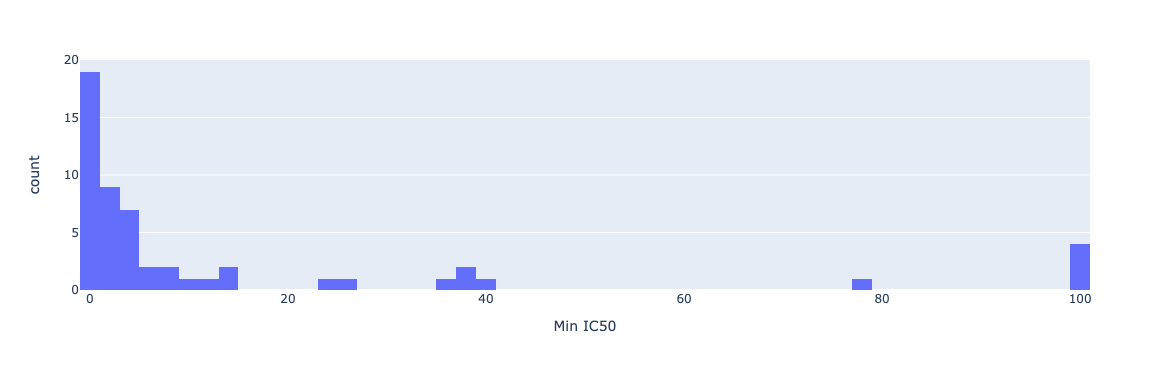

In [551]:
px.histogram(creators.loc[~creators['Min IC50'].isna()], 'Min IC50', nbins=50)

In [502]:
creators.columns.values

array(['Mdn shipment date', 'Mdn N words', 'N submissions', 'N assayed',
       'N made', 'N crystallised', 'N assayed (early wave)',
       'N made (early wave)', 'N crystallised (early wave)',
       'N assayed (late wave)', 'N made (late wave)',
       'N crystallised (late wave)', 'Gmean IC50',
       'Gmean IC50 (early wave)', 'Gmean IC50 (late wave)', 'Min IC50',
       'crystal-over-made %', 'crystal-over-made % (early wave)',
       'crystal-over-made % (late wave)', 'N IC50 ≤ 50 µM',
       'N IC50 ≤ 20 µM', 'N IC50 ≤ 1 µM', 'N IC50 ≤ 0.1 µM',
       'sub50-over-assayed %', 'pIC50', 'name', 'cutoff_words',
       'Mdn N words (100 max)', 'mean pIC50', 'mean pIC50 (early wave)',
       'ln N submissions', 'ln N made', 'move-over-submissions-ratio',
       'made-over-submissions-ratio', 'smooth_made', 'smooth_submissions',
       'smooth-made-over-submissions-ratio'], dtype=object)

In [522]:
creators['Min IC50'].min()

0.0197

In [552]:
creators['Min IC50']

Matthew Robinson               0.0416
Aaron Morris                  37.8000
Ed Griffen                     0.0396
anonymous                      0.0197
Alpha Lee                      0.0500
                               ...   
Zachary Kiick                     NaN
Zackary Titus                     NaN
samuel none                       NaN
sul University of Maryland        NaN
vitamin biology                   NaN
Name: Min IC50, Length: 413, dtype: float64

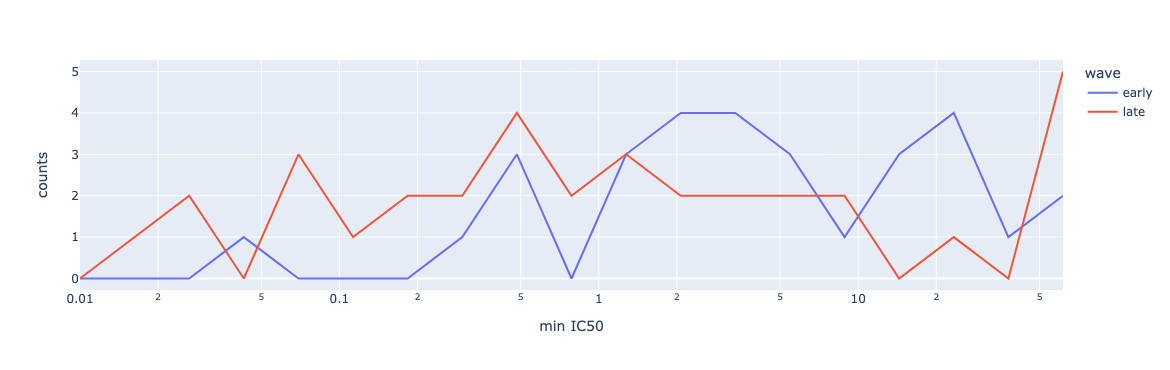

In [576]:

def histopandas(series, bin_edges):
    counts, bins = np.histogram(series, bins=bin_edges)
    return pd.DataFrame({'min IC50': bins[:-1], 'counts': counts})


df = pd.concat([histopandas(series=creators['Min IC50 (early wave)'], bin_edges=np.logspace(-2, 2, 20)).assign(wave='early'),
               histopandas(series=creators['Min IC50 (late wave)'], bin_edges=np.logspace(-2, 2, 20)).assign(wave='late')
              ])

# 
fig = px.line(df, x='min IC50', y='counts', log_x=True, color='wave')  # , labels={'x':'Min IC50', 'y':'count'}
#fig.update_traces(marker=dict(symbol='line-ew', line_width=5))
fig

In [580]:
creators['preferred'] = creators['made-over-submissions-ratio'] >= 0.2

30


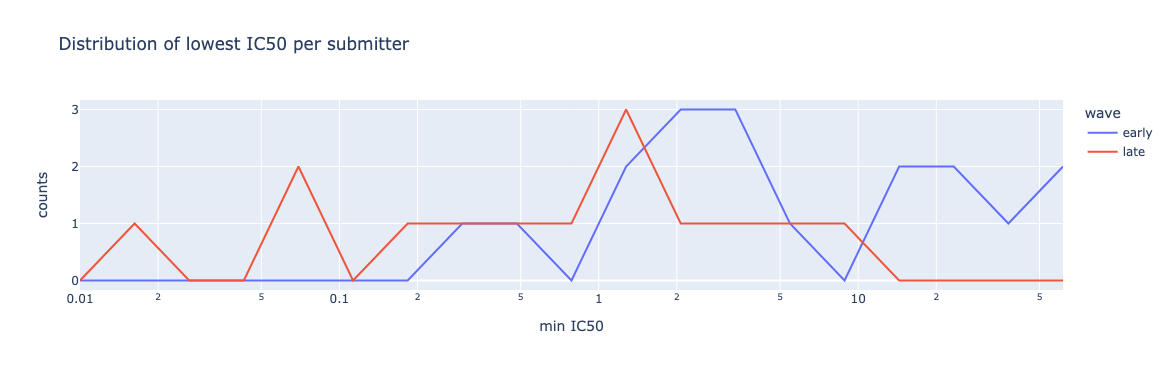

In [621]:
subbed = creators.loc[(creators['made-over-submissions-ratio'] < 0.2) & (~creators['Min IC50'].isna())]
print(len(subbed))

def histopandas(series, bin_edges):
    counts, bins = np.histogram(series, bins=bin_edges)
    return pd.DataFrame({'min IC50': bins[:-1], 'counts': counts})


df = pd.concat([histopandas(series=subbed['Min IC50 (early wave)'], bin_edges=np.logspace(-2, 2, 20)).assign(wave='early'),
               histopandas(series=subbed['Min IC50 (late wave)'], bin_edges=np.logspace(-2, 2, 20)).assign(wave='late')
              ])

# 
fig = px.line(df, x='min IC50', y='counts', log_x=True, color='wave', title='Distribution of lowest IC50 per submitter')  # , labels={'x':'Min IC50', 'y':'count'}
#fig.update_traces(marker=dict(symbol='line-ew', line_width=5))
fig

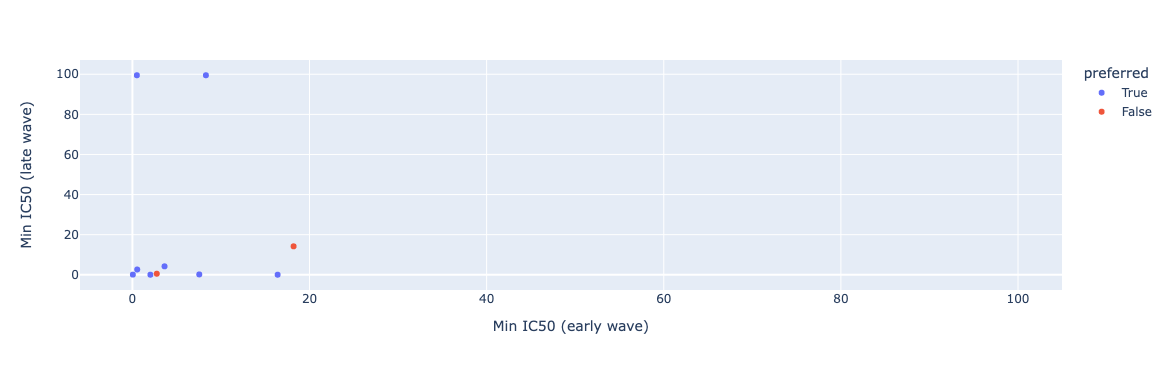

In [583]:
# ths is stupid as it requires one in each...
px.scatter(creators, 'Min IC50 (early wave)', 'Min IC50 (late wave)', color='preferred')

In [592]:
sum(~creators['Min IC50'].isna())

54

In [596]:
sum((creators['N crystallised'] > 0) & (~creators['Min IC50'].isna()))

40

In [623]:
moonshot['inferred_submission_month'] = moonshot['inferred_submission_date'].apply(lambda d: d.month + 12 * (d.year -2020))

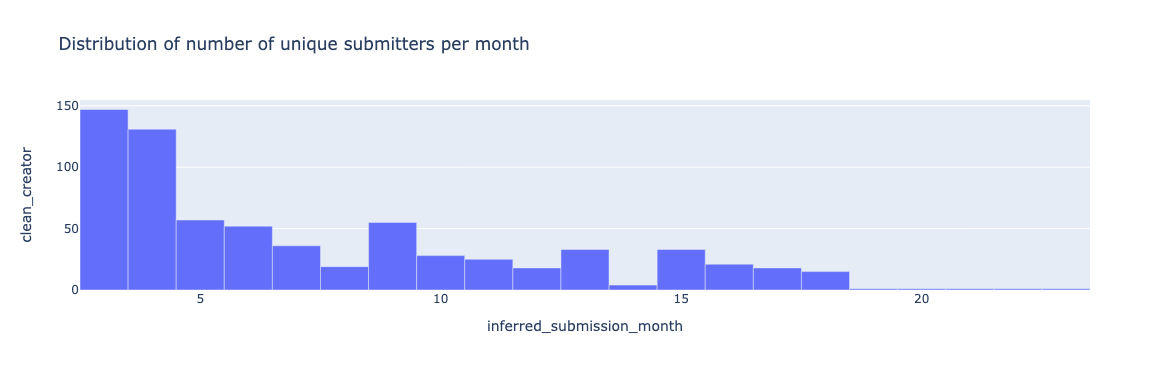

In [637]:



fig = px.bar(pd.pivot_table(moonshot, index='inferred_submission_month', values='clean_creator', aggfunc=pd.Series.nunique).reset_index(), 
       x='inferred_submission_month',
      y='clean_creator',
    title='Distribution of number of unique submitters per month')
fig.update_layout(bargap=0.)
fig

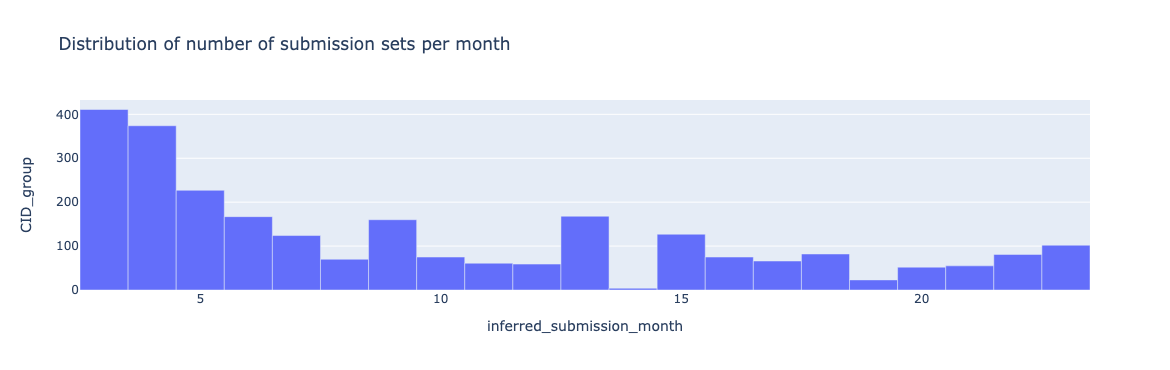

In [641]:
fig = px.bar(pd.pivot_table(moonshot, index='inferred_submission_month', values='CID_group', aggfunc=pd.Series.nunique).reset_index(), 
       x='inferred_submission_month',
      y='CID_group',
    title='Distribution of number of submission sets per month')
fig.update_layout(bargap=0.)
fig

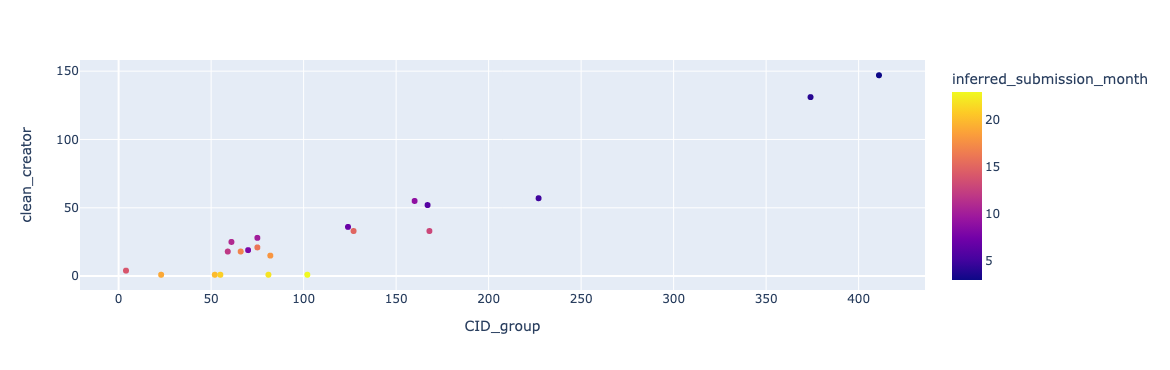

In [661]:
px.scatter(pd.pivot_table(moonshot, index='inferred_submission_month', values=['CID_group', 'clean_creator'], aggfunc=pd.Series.nunique).reset_index(),
           x='CID_group',
           y='clean_creator',
           color='inferred_submission_month'
          )

In [673]:
subbed = creators.loc[creators['N crystallised (early wave)'] >= 1]


print(
pd.DataFrame(dict(ratio=(subbed['N crystallised (early wave)'] / subbed['N made (early wave)']),
                  #N_submitted=subbed['N submissions (early wave)'],
                  N_made=subbed['N made (early wave)'],
                  N_crystallised=subbed['N crystallised (early wave)']
                 )
                 ).sort_values('ratio', ascending=False).round(2)[['N_made','N_crystallised', 'ratio']].to_markdown()
)

|                       |   N_made |   N_crystallised |   ratio |
|:----------------------|---------:|-----------------:|--------:|
| Daniel Flaherty       |        1 |                1 |    1    |
| Jordi JuarezJimenez   |        2 |                2 |    1    |
| Adam Smalley          |        2 |                2 |    1    |
| Adam Nelson           |        2 |                2 |    1    |
| Daniel Zaidman        |        1 |                1 |    1    |
| David Briggs          |        3 |                2 |    0.67 |
| Ed Griffen            |       20 |               11 |    0.55 |
| Jan Hullaert          |       35 |               18 |    0.51 |
| Duncan Miller         |        8 |                4 |    0.5  |
| Tobias Grabe          |        2 |                1 |    0.5  |
| Simon Williams        |        2 |                1 |    0.5  |
| Steven Verhelst       |        2 |                1 |    0.5  |
| Tryfon Zarganis       |       20 |               10 |    0.5  |
| Bruce Le

In [671]:
!pip install tabulate

In [694]:
date_cutoff = dt.datetime(2020, 8, 1)
N_sub = moonshot.loc[(moonshot.inferred_submission_date < date_cutoff) & (~moonshot.clean_creator.isin(['Mark Davies', 'Maksym Voznyy']))].clean_creator.value_counts().rename('N_submissions')

df = pd.DataFrame(dict(ratio=(creators['N made (early wave)']/N_sub),
                  N_submitted=N_sub,
                  N_made=creators['N made (early wave)'],
                  N_crystallised=creators['N crystallised (early wave)']
                 )
                 ).sort_values('ratio', ascending=False).round(2)[['N_submitted', 'N_made','ratio']].dropna()


print(sum(N_sub), sum(creators['N made (early wave)']))
print(
df.loc[df.N_submitted >= 5].to_markdown()
)

7118 861
|                                     |   N_submitted |   N_made |   ratio |
|:------------------------------------|--------------:|---------:|--------:|
| Lori Ferrins                        |            28 |       27 |    0.96 |
| Rodolfo Do Couto Maia               |             9 |        7 |    0.78 |
| Erik Gilberg                        |             6 |        4 |    0.67 |
| Nir London                          |           280 |      179 |    0.64 |
| Alexander Metz                      |             9 |        5 |    0.56 |
| Renato Freitas                      |             6 |        3 |    0.5  |
| Anna Cederbalk                      |            10 |        5 |    0.5  |
| Bart Lenselink                      |           169 |       79 |    0.47 |
| Vijay Shahani                       |            13 |        6 |    0.46 |
| Comp Chem Team                      |            18 |        8 |    0.44 |
| Gerard Pujadas                      |             7 |        3 | 